In [70]:
import tensorflow as tf
from tensorflow import keras
from plantcv import plantcv as pcv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
print(tf.__version__)
print(pd.__version__)

2.12.0
2.0.2


In [72]:
# How many parameters are we inputing into our model
num_parameters = 13 

In [73]:
# See if there are any GPUs that can be used to run our code
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [74]:
csv_filepath = "../BiomassPredictonAI/harvest_bydate.csv"

In [75]:
data = pd.read_csv(csv_filepath)
input_data = data.iloc[:, 12:]
input_data

,plant_area,plant_convex_hull_area,plant_solidity,plant_perimeter,plant_width,plant_height,plant_longest_path
0,1211,1456.0,0.831731,189.923880,49,42,346
1,1412,1556.5,0.907164,181.338094,56,41,387
2,1323,1766.5,0.748939,225.480229,49,54,332
3,1621,1787.0,0.907107,195.580734,44,59,395
4,1919,2372.0,0.809022,263.421354,62,58,453
...,...,...,...,...,...,...,...
79,3590,4191.5,0.856495,313.279218,88,68,710
80,2832,3384.0,0.836879,272.007140,57,75,595
81,2714,3456.5,0.785187,320.592927,59,84,579
82,1801,2538.5,0.709474,279.178713,74,53,608


In [76]:
input_data = input_data.to_numpy()
input_data

array([[1.21100000e+03, 1.45600000e+03, 8.31730769e-01, 1.89923880e+02,
        4.90000000e+01, 4.20000000e+01, 3.46000000e+02],
       [1.41200000e+03, 1.55650000e+03, 9.07163508e-01, 1.81338094e+02,
        5.60000000e+01, 4.10000000e+01, 3.87000000e+02],
       [1.32300000e+03, 1.76650000e+03, 7.48938579e-01, 2.25480229e+02,
        4.90000000e+01, 5.40000000e+01, 3.32000000e+02],
       [1.62100000e+03, 1.78700000e+03, 9.07106883e-01, 1.95580734e+02,
        4.40000000e+01, 5.90000000e+01, 3.95000000e+02],
       [1.91900000e+03, 2.37200000e+03, 8.09021922e-01, 2.63421354e+02,
        6.20000000e+01, 5.80000000e+01, 4.53000000e+02],
       [1.15000000e+03, 2.05350000e+03, 5.60019479e-01, 2.72450791e+02,
        7.60000000e+01, 4.30000000e+01, 4.99000000e+02],
       [1.77200000e+03, 2.17400000e+03, 8.15087397e-01, 2.38793937e+02,
        6.80000000e+01, 5.10000000e+01, 4.68000000e+02],
       [8.93000000e+02, 1.05200000e+03, 8.48859316e-01, 1.55296463e+02,
        4.10000000e+01, 3

In [77]:
output_data = data.iloc[:, 6]
output_data

0     1.30
1     2.10
2     3.36
3     3.07
4     3.17
      ... 
79    7.21
80    6.50
81    6.22
82    3.27
83    7.94
Name: LFW_g, Length: 84, dtype: float64

In [78]:
output_data = output_data.to_numpy()
output_data

array([ 1.3 ,  2.1 ,  3.36,  3.07,  3.17,  1.82,  3.12,  1.38,  2.03,
        2.15,  3.54,  2.02,  1.19,  3.66,  1.47,  2.46,  1.79,  2.23,
        2.54,  3.7 ,  3.  ,  2.14,  3.3 ,  2.29,  2.44,  3.23,  2.64,
        3.46,  2.91,  3.34,  2.51,  2.58,  3.69, 10.95,  9.7 ,  9.2 ,
       15.06, 12.86, 15.27, 11.26, 15.29, 12.11, 14.64,  6.3 , 11.32,
        8.74,  9.59,  3.95,  1.82,  8.66, 12.3 , 12.4 , 10.47,  8.98,
        9.6 , 13.69, 14.39, 13.44, 13.76, 13.33,  6.82, 12.42,  6.76,
       10.29,  5.54, 16.44,  9.46, 12.24,  8.75, 15.56, 18.81,  9.89,
       19.94, 11.04,  9.87,  9.98,  4.92,  5.49,  6.23,  7.21,  6.5 ,
        6.22,  3.27,  7.94])

In [79]:
#input_data.corr()

In [80]:
# created callback to prevent overfitting
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('mean_absolute_percentage_error') < 0.15:
            print("\nReached 90 percent so cancelling training")
            self.model.stop_training = True


callbacks = myCallback()

In [81]:
normalized_data = tf.keras.layers.Normalization(input_shape=[7,], axis=None)
normalized_data.adapt(input_data)

In [82]:
# This function will be used to create our model
def create_model():
    model = keras.Sequential([
        normalized_data,
        #tf.keras.layers.Dense(64, activation="relu", input_shape=[7]),
        #tf.keras.layers.Dense(16, activation="linear"),
        #tf.keras.layers.Dense(16, activation="linear"),
        tf.keras.layers.Dense(units=1)
    ])

    model.compile(
        loss='mean_squared_error', #TODO: change loss function for regression
        optimizer=tf.keras.optimizers.Adam(0.01),
        metrics=["mean_absolute_percentage_error"]
    )

    return model

In [83]:
model = create_model()

In [84]:
history = model.fit(
    input_data,
    output_data,
    epochs=150,
    validation_split = 0.1,
    callbacks=[callbacks]
)

Epoch 1/150
3/3 [==============================] - 1s 90ms/step - loss: 49.5696 - mean_absolute_percentage_error: 76.7566 - val_loss: 25.4924 - val_mean_absolute_percentage_error: 74.8882
Epoch 2/150
3/3 [==============================] - 0s 19ms/step - loss: 47.0683 - mean_absolute_percentage_error: 73.0907 - val_loss: 23.8447 - val_mean_absolute_percentage_error: 72.0939
Epoch 3/150
3/3 [==============================] - 0s 19ms/step - loss: 44.6958 - mean_absolute_percentage_error: 69.4669 - val_loss: 22.2647 - val_mean_absolute_percentage_error: 69.3139
Epoch 4/150
3/3 [==============================] - 0s 21ms/step - loss: 42.3643 - mean_absolute_percentage_error: 65.9636 - val_loss: 20.7596 - val_mean_absolute_percentage_error: 66.5628
Epoch 5/150
3/3 [==============================] - 0s 21ms/step - loss: 39.9517 - mean_absolute_percentage_error: 62.6083 - val_loss: 19.3445 - val_mean_absolute_percentage_error: 63.8731
Epoch 6/150
3/3 [==============================] - 0s 21ms/s

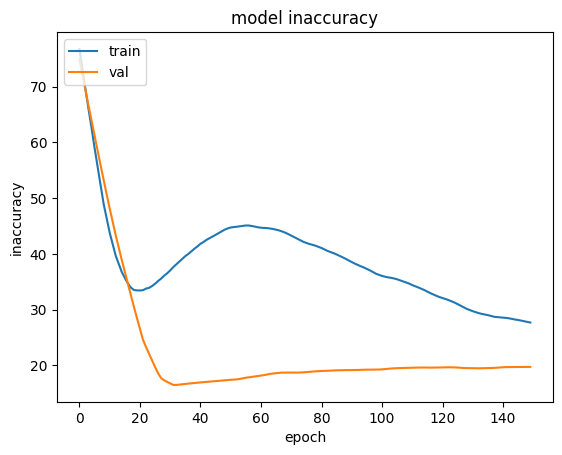

In [85]:
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('model inaccuracy')
plt.ylabel('inaccuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

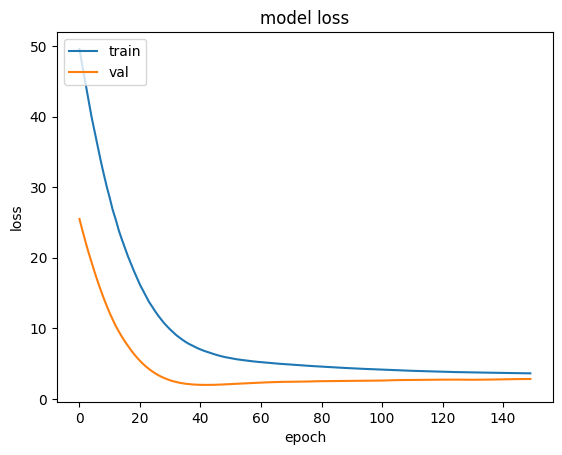

In [86]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [87]:
# This will allow us to save model weights after training
model.save_weights('./checkpoints/model_weights')